# M&M model VEM updates

In [1]:
dat = readRDS('/home/gaow/Documents/GTExV8/Thyroid.Lung.FMO2.filled.rds')
attach(dat)

In [27]:
%get X Y --from R
Y = Y.as_matrix()

In [28]:
from libgaow.regression_data import MNMASH
import numpy as np

In [29]:
model = MNMASH(X=X,Y=Y)

In [30]:
model.set_prior({'identity': np.identity(2), 
                 'single_1': np.array([[1,0],[0,0]]), 
                 'single_2': np.array([[0,0], [0,1]]), 
                 'all_in': np.ones((2,2))}, 
                [0.5,1], 
                [0.9,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.02])

In [31]:
model.fit()

/opt/miniconda3/lib/python3.6/site-packages/libgaow-0.1-py3.6.egg/libgaow/model_mash.py:81: RuntimeWarning: divide by zero encountered in log
  self.data.lik['null_loglik'] = np.log(self.data.lik['relative_likelihood'][:,0]) + self.data.lik['lfactor']
/opt/miniconda3/lib/python3.6/site-packages/libgaow-0.1-py3.6.egg/libgaow/model_mash.py:114: RuntimeWarning: invalid value encountered in sqrt
  sigma_vec = np.sqrt(np.diag(U1_mat))
/opt/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1819: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) & (scale > 0)
/opt/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/opt/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/opt/miniconda3/lib/python3.6/s

ValueError: array must not contain infs or NaNs

In [10]:
model.post_mean_mat

array([[ -1.04291072e-21,  -5.58051289e-22],
       [ -1.77377302e-15,  -1.76887967e-15],
       [ -1.15121535e-18,  -1.15039931e-18],
       ..., 
       [  6.76559354e-21,   2.61296975e-21],
       [ -1.08939477e-19,  -5.34275355e-20],
       [  8.73588121e-21,   3.50093772e-21]])

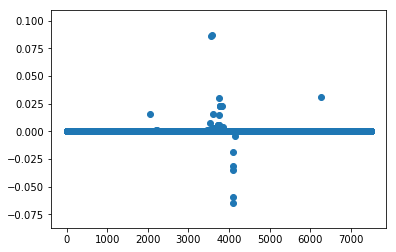

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter([x+1 for x in range(len(model.post_mean_mat[:,0]))], model.post_mean_mat[:,0], cmap="viridis")
ax = plt.gca()
plt.show()

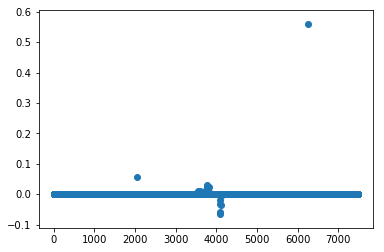

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter([x+1 for x in range(len(model.post_mean_mat[:,1]))], model.post_mean_mat[:,1], cmap="viridis")
ax = plt.gca()
plt.show()

## Debug previews

In [33]:
model.mash.B

array([[ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       ..., 
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan]])

In [34]:
model.mash.S

array([[ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       ..., 
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan]])

In [32]:
print(model)

{   'Xr0': array([[ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       ..., 
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan]]),
    'Y': array([[  1.60689480e-01,   7.73609574e-01],
       [  4.33098395e-01,   7.81487761e-01],
       [ -2.15164667e-01,  -6.50111523e-01],
       ..., 
       [  6.17574628e-01,   2.16840434e-18],
       [  3.03576608e-18,  -5.08905465e-02],
       [ -1.49299907e-01,   3.02853264e-01]]),
    'alpha0': array([[  2.98153710e-07,   4.15231470e-07,   5.16027052e-07, ...,
          2.95486232e-07,   3.00081368e-07,   2.99693337e-07],
       [  4.41186673e-06,   7.36713611e-06,   7.16004811e-06, ...,
          4.73572754e-06,   4.32323980e-06,   4.75517059e-06],
       [  8.23553510e-06,   1.40161300e-05,   1.35992148e-05, ...,
          9.11091344e-06,   7.35916489e-06,   9.15446122e-06],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  7.69188143